# Circuit with PB

In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from doe_modules.design import PlackettBurman, DOE, FullFactorial
from doe_modules.plot import bio_multicomp
from doe_modules.preferences import kwarg_savefig, outputdir
from doe_modules.simulation import AbstractSimulator, Circuit, MLR, Sparse

In [2]:
class Config(NamedTuple):
    savefig: bool = True
    out: str = outputdir
    design: DOE = FullFactorial
    simulator: AbstractSimulator = Sparse
    run_names: list = None
    preffix: str = ""
    suffix: str = "_circuit"

conf = Config(savefig=False)

In [3]:
from doe_modules.preferences.cmap import circuit as cmap

In [4]:
model = conf.simulator()
exmatrix = conf.design().get_exmatrix(n_factor=9)()
n_rep = 10

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exmatrix) * n_rep)

expressions = []
output = []

for i, s in enumerate(seeds):
    model.run(exmatrix.iloc[i // n_rep, :], random_state=s)
    expressions += [list(model.x.values())]
    output += [[max(0, model.y)]]

In [5]:
from sklearn.linear_model import LinearRegression

(array([1.64618119]), 1.478359763143099)

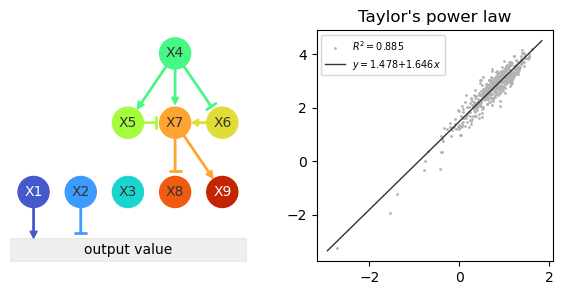

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
plt.subplots_adjust(wspace=0.3)

ym = np.array(output).reshape(10, -1).T.mean(axis=1)
yv = np.array(output).reshape(10, -1).T.var(axis=1)

lrm = LinearRegression()
lrm.fit(np.log(ym).reshape(-1, 1), np.log(yv))

conf.simulator().plot(ax=ax[0])
# ax[0].set_title(conf.sim_name)
ax[-1].scatter(
    np.log(ym), np.log(yv), s=1, c=".7", 
    label=r"$R^2=$" + f"{lrm.score(np.log(ym).reshape(-1, 1), np.log(yv)).round(3)}"
)

xlim, ylim = ax[-1].get_xlim(), ax[-1].get_ylim()

ax[-1].plot(
    xlim, lrm.coef_ * np.array(xlim) + lrm.intercept_, 
    c=".2", lw=1, 
    label = "$y=$" + f"{lrm.intercept_.round(3)}" + "$+$" + f"{lrm.coef_.round(3).item()}" + "$x$"
)

ax[1].set(title="Taylor's power law")
ax[1].legend(fontsize="x-small")

lrm.score(np.log(ym).reshape(-1, 1), np.log(yv))
lrm.coef_, lrm.intercept_

# ax[2].set_xlim(np.min([xlim, ylim]), np.max([xlim, ylim]))
# ax[2].set_ylim(np.min([xlim, ylim]), np.max([xlim, ylim]))

In [21]:
model = conf.simulator()
exmatrix = conf.design().get_exmatrix(n_factor=9)()
n_rep = 10

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exmatrix) * n_rep)

expressions = []

for i, s in enumerate(seeds):
    model.run(exmatrix.iloc[i // n_rep, :], random_state=s)
    expressions += [list(model.x.values())]

/tmp/ipykernel_38042/240965853.py:9: RuntimeWarning: divide by zero encountered in log
  ax[2].scatter(np.log(m.ravel()), np.log(v.ravel()), c=cmap * len(exmatrix), s=1)


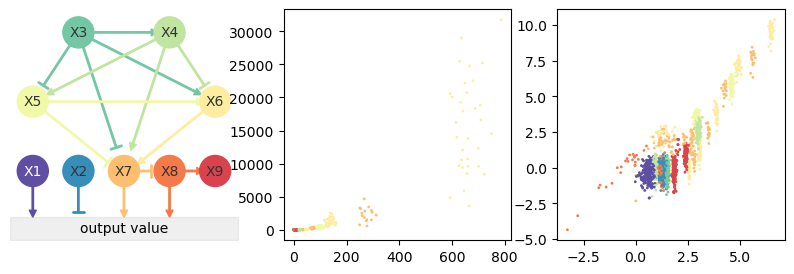

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

m = np.array(expressions).reshape(-1, 10, 9).mean(axis=1)
v = np.array(expressions).reshape(-1, 10, 9).var(axis=1)

conf.simulator().plot(ax=ax[0])
# ax[0].set_title(conf.sim_name)
ax[1].scatter(m.ravel(), v.ravel(), c=cmap * len(exmatrix), s=1)
ax[2].scatter(np.log(m.ravel()), np.log(v.ravel()), c=cmap * len(exmatrix), s=1)

/tmp/ipykernel_38042/4014694176.py:4: RuntimeWarning: divide by zero encountered in log
  _temp = pd.DataFrame(dict(m=np.log(m[:, i]), v=np.log(v[:, i])))
/tmp/ipykernel_38042/4014694176.py:5: RuntimeWarning: divide by zero encountered in log
  a.scatter(np.log(m[:, i]), np.log(v[:, i]), c=cmap[i])
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, whi

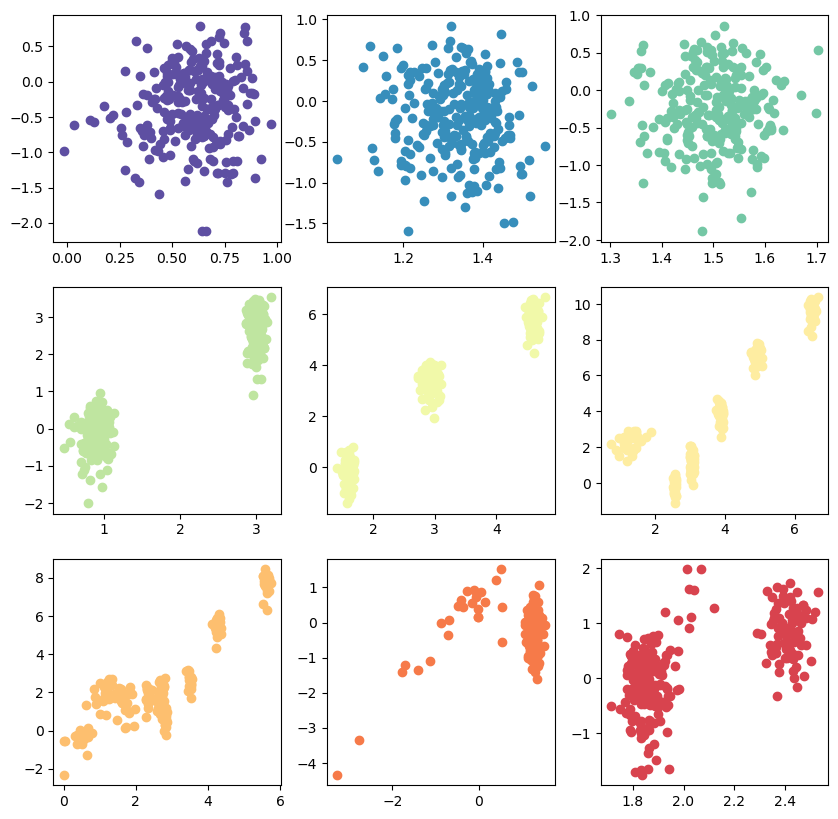

In [33]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i, a in enumerate(ax.ravel()):
    _temp = pd.DataFrame(dict(m=np.log(m[:, i]), v=np.log(v[:, i])))
    a.scatter(np.log(m[:, i]), np.log(v[:, i]), c=cmap[i])

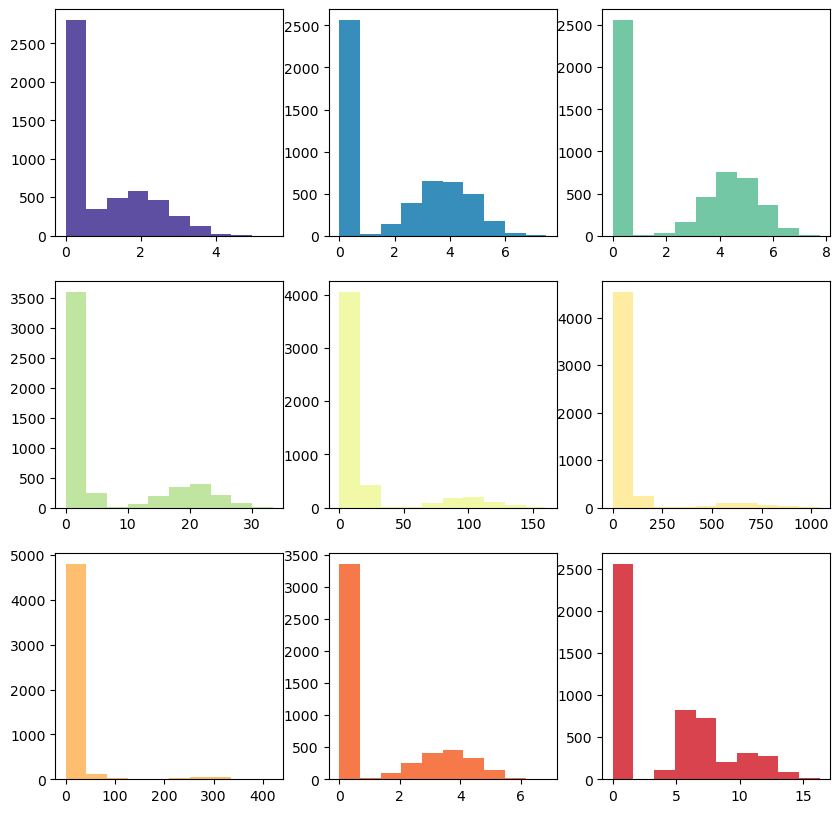

In [38]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i, a in enumerate(ax.ravel()):
    a.hist(np.array(expressions)[:, i], bins=10, color=cmap[i])